# Taller de Futbol Analytics

La idea de este taller es bla bla ... queremos que se lleven bla bla...

In [11]:
# Primero importamos unas librerías de Python que vamos a usar a lo largo del notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from adjustText import adjust_text

In [12]:
# Obtenemos los datos desde el archivo df_reducido.csv
df = pd.read_csv("datasets_procesados/df_reducido.csv")

In [13]:
# Podemos obtener una primera visualización de los datos viendo sus primeras 5 filas con el comando head()
display(df.head())

,Jugador,Equipo,Competición,Posición,Edad,Partidos,Minutos,Goles,Asistencias,xG,xAG,npxG,ValorMercado
0,Erling Haaland,Manchester City,Premier League,FW,24-259,28,"2,480",21,3,20.8,2.8,18.4,200000000.0
1,Jude Bellingham,Real Madrid,La Liga,MF,21-281,24,"1,983",8,7,8.9,3.6,7.3,180000000.0
2,Kylian Mbappé,Real Madrid,La Liga,FW,26-107,28,"2,420",22,3,20.0,6.5,14.5,170000000.0
3,Bukayo Saka,Arsenal,Premier League,"FW,MF",23-213,18,"1,338",6,10,5.2,6.0,4.4,150000000.0
4,Jamal Musiala,Bayern Munich,Bundesliga,MF,22-039,25,"1,798",12,2,9.3,4.5,9.3,140000000.0


Fijense que en los datos que tenemos que tienen solo numeros, hay menos columnas (porque nos quedamos solo con las que tienen números)

In [15]:
# Con este comando podemos ver las columnas (o sea, toda la información que tenemos de cada jugador)
print(list(df.columns))

['Jugador', 'Equipo', 'Competición', 'Posición', 'Edad', 'Partidos', 'Minutos', 'Goles', 'Asistencias', 'xG', 'xAG', 'npxG', 'ValorMercado']


También podemos usar gráficos para ver la información de manera más comprimida. Por ejemplo si queremos ver los goles y las asistencias de los jugadores, los podemos poner en un gráfico:

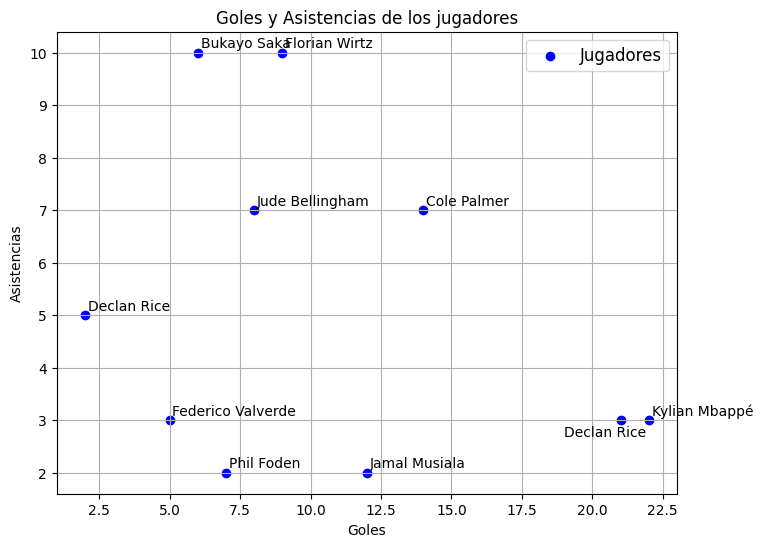

In [21]:
df_grafico=df[:10]
plt.figure(figsize=(8, 6))
plt.scatter(df_grafico['Goles'], df_grafico['Asistencias'], label="Jugadores", color="blue")
plt.text(df_grafico['Goles'][0]-2, df_grafico['Asistencias'][0]-0.3, df["Jugador"][i])
for i in range(1,10):
    plt.text(df_grafico['Goles'][i]+0.1, df_grafico['Asistencias'][i]+0.1, df["Jugador"][i])
plt.xlabel('Goles')
plt.ylabel('Asistencias')
plt.title('Goles y Asistencias de los jugadores')
plt.grid()
plt.legend(fontsize=12)
plt.show()

Se pone divertido cuando podemos ver un monton de estos datos. Podemos buscar relaciones entre las estadísticas de los futbolistas.

Elijamos dos columnas y veamos la relación:

In [7]:
# Acá capaz podrían jugar un poco con esto
primera_columna = 'passing_Cmp' # Pases completados cada 90 minutos
segunda_columna = 'shooting_Sh' # Tiros totales cada 90 minutos

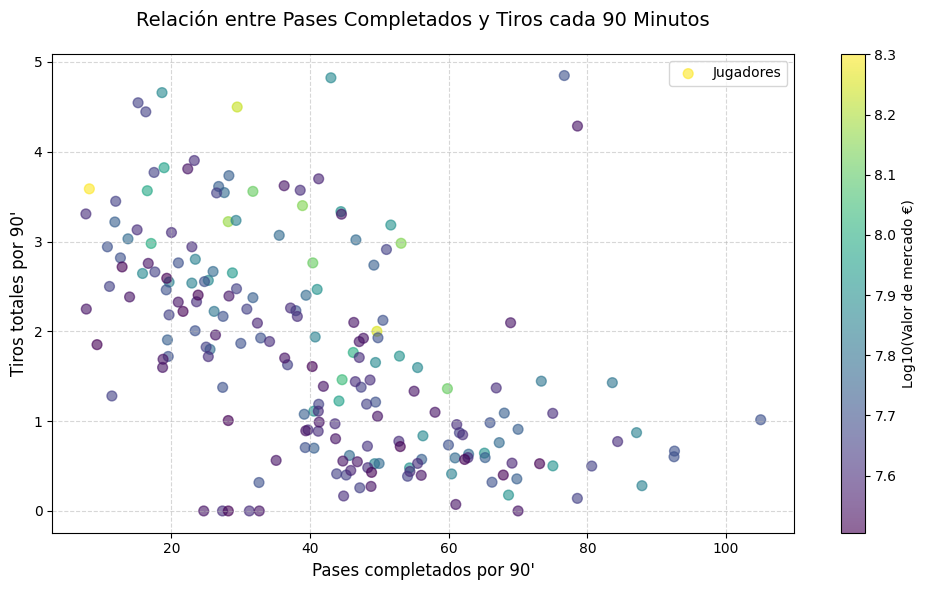

In [9]:
# Configuración de estilo
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Normalizar las métricas por 90 minutos
pases_90 = df_sin_Andersen['passing_Cmp'] / df_sin_Andersen['stats_90s']
tiros_90 = df_sin_Andersen['shooting_Sh'] / df_sin_Andersen['stats_90s']

plt.scatter(
    x=pases_90,
    y=tiros_90,
    c=np.log10(df_sin_Andersen['market_value_in_eur']),  # Escala logarítmica base 10
    cmap='viridis',
    alpha=0.6,
    s=50
)
cbar = plt.colorbar()
cbar.set_label('Log10(Valor de mercado €)', fontsize=10)

# Títulos y etiquetas
plt.title('Relación entre Pases Completados y Tiros cada 90 Minutos', fontsize=14, pad=20)
plt.xlabel('Pases completados por 90\'', fontsize=12)
plt.ylabel('Tiros totales por 90\'', fontsize=12)

# Grid y leyenda
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Jugadores'], loc='upper right')

# Mostrar gráfico
plt.tight_layout()  # Evita cortes en etiquetas
plt.show()

Estuve experimentando con estas cosas. Pero habría que repensar varias cosas, como ponerles nombres más descriptivos a las columnas, hacer gráficos más interesantes, etc

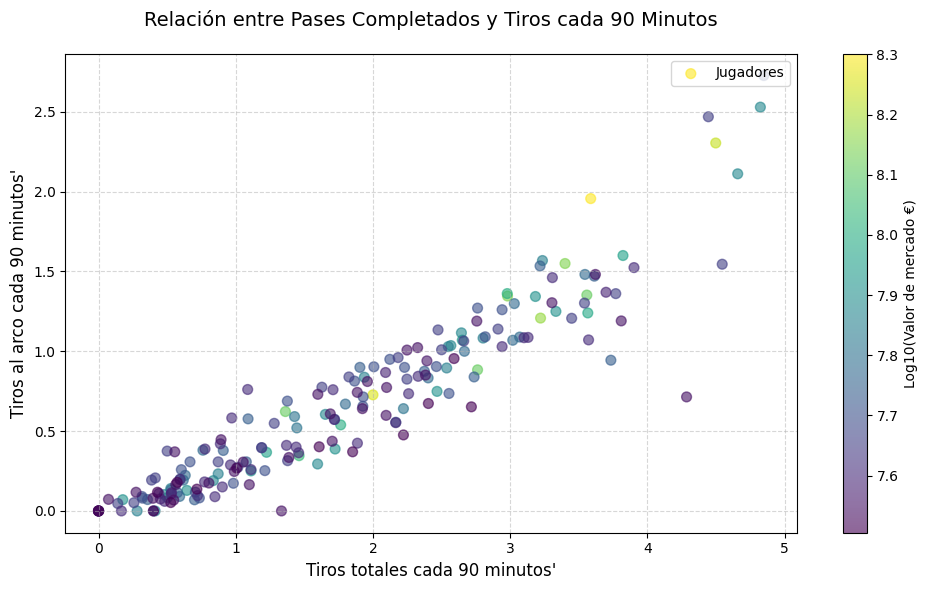

In [10]:
# Configuración de estilo
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Normalizar las métricas por 90 minutos
tiros_al_arco_90 = df_sin_Andersen['shooting_SoT'] / df_sin_Andersen['stats_90s']
tiros_90 = df_sin_Andersen['shooting_Sh'] / df_sin_Andersen['stats_90s']

plt.scatter(
    x=tiros_90,
    y=tiros_al_arco_90,
    c=np.log10(df_sin_Andersen['market_value_in_eur']),  # Escala logarítmica base 10
    cmap='viridis',
    alpha=0.6,
    s=50
)
cbar = plt.colorbar()
cbar.set_label('Log10(Valor de mercado €)', fontsize=10)

# Títulos y etiquetas
plt.title('Relación entre Pases Completados y Tiros cada 90 Minutos', fontsize=14, pad=20)
plt.xlabel('Tiros totales cada 90 minutos\'', fontsize=12)
plt.ylabel('Tiros al arco cada 90 minutos\'', fontsize=12)

# Grid y leyenda
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Jugadores'], loc='upper right')

# Mostrar gráfico
plt.tight_layout()  # Evita cortes en etiquetas
plt.show()